# Titles, Ticks, and Text
Let's continue working with our wage graph from before.  Here's where we left off with our code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
W = pd.read_csv('wages.csv')
W = W.set_index('year')
W2 = W.drop('all_workers', axis=1)

In [3]:
labeldict = {'less_than_high_school': 'less than high school', 
             'high_school': 'high school degree',
             'some_college': 'some college',
             'college_degree': 'college degree',
             'advanced_degree': 'advanced degree'
            }

linestyledict = {'less_than_high_school': (0,(1,1)), 
             'high_school': (0,(2,1)),
             'some_college': (0,(4,1)),
             'college_degree': (0,(6,1)),
             'advanced_degree': (0,(10,1))
            }

colormap = plt.cm.gnuplot
colors = [colormap(i) for i in np.linspace(0, 0.9, W.shape[1])]
colordict = dict(zip(['less_than_high_school', 
             'high_school',
             'some_college',
             'college_degree',
             'advanced_degree'], colors))

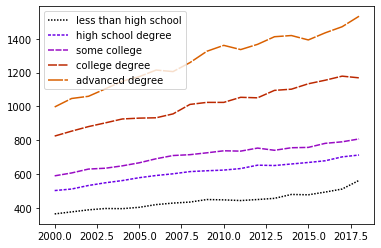

In [4]:
for var in W2.columns:
    plt.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
plt.legend()

Broadly speaking, there are two styles that you can use with matplotlib.  There is a procedural style that uses a lot of top-level `plt` methods: `plt.plot`, `plot.legend()`, and so on.  The above cell is a good example of this style.  You can see that it's really compact and you can generate plots very quickly.

The second style for matplotlib is more object-oriented.  To use this style, you start by explicitely creating variables that point to a `Figure` and an `Axes`.  You then call methods on these instances.  Here's an example, where we refactor the above cell to be more object-oriented. 

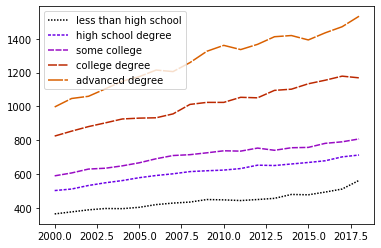

In [5]:
fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.legend()

In this case, there's not much difference, but for really complicated plots, you might have to use the object-oriented style, since there are some things the procedural style can't do.  To get you more used to the object oriented style, I'll use it for the rest of this video.

First, let's think about the y-axis.  Sometimes it's ok to have a y-axis that doesn't start from zero.  In this case however, zero is the most natural reference point for comparing the magnitude of wages.  Starting from 300 makes the lines look steeper and also spreads them apart from each other.  This can trick our visual system into thinking that the differences between education levels are more dramatic than they really are.  It's not an aggregious error, but it is an example of distorting the data. Because of this, let's change the y-axis to start at zero.  This is done with the `Axes.set_ylim()` method (Or call `plt.ylim()`).

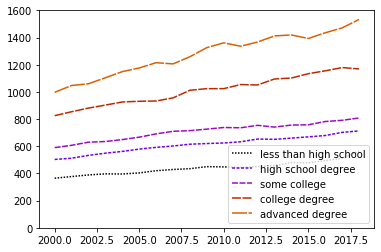

In [6]:
fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend()

To add a title, use `Axes.set_title()`.  The more procedural style is to call `plt.title()`. 

Text(0.5, 1.0, 'Growth of Weekly Wage by Education')

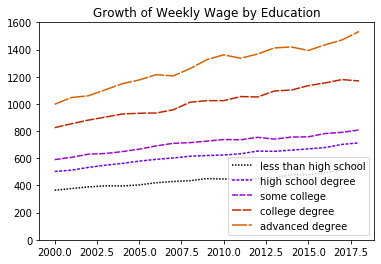

In [7]:
fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend()
ax.set_title('Growth of Weekly Wage by Education')

Sometimes, if you're putting a graph into a paper with a caption, you don't need the title.  It depends on the paper style you're using.

### Formatting an Axis

Next, let's improve the numbers along the x-axis.  We'll use `Axes.set_xticklabels()`.  To change the position of the ticks, we would use `Axes.set_xticks()`.

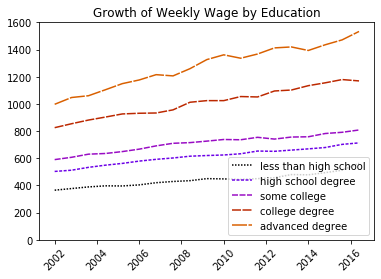

In [8]:
fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend()
ax.set_title('Growth of Weekly Wage by Education')

ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
pass

We can similarly add a label for the y-axis.

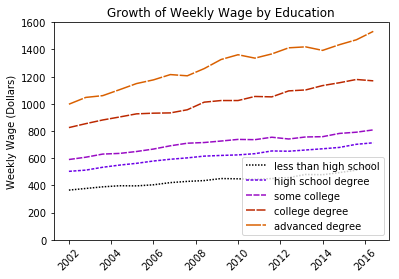

In [20]:
fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend()
ax.set_title('Growth of Weekly Wage by Education')

ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Weekly Wage (Dollars)')

We might want to add a dollar sign to the dollar numbers.  For this kind of fine-grained control, we would define a formatter.  This functionality is provided in the `matplotlib.ticker` library.

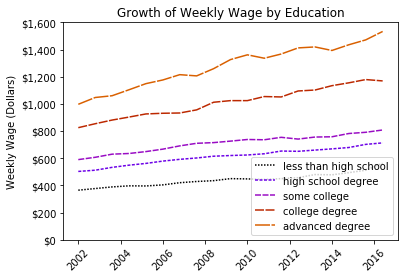

In [9]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend()
ax.set_title('Growth of Weekly Wage by Education')

ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Weekly Wage (Dollars)')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

### Moving the Legend

In this case, we can see that our legend overlaps the lines and we might want to move it.  The easiest way to move the legend is with the `loc` argument.

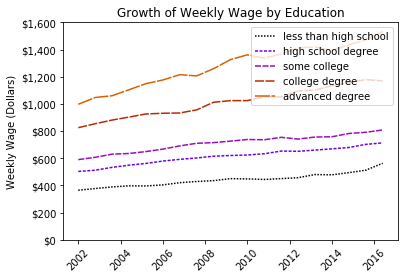

In [10]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend(loc = 'upper right')
ax.set_title('Growth of Weekly Wage by Education')

ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Weekly Wage (Dollars)')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

In this case, that made things worse.  For more control, we could use the `bbox_to_anchor` argument.  The simplest way to use this is to pass in x-y coordinates.  By default, 0 will represent the left or bottom of the `Axes`, 1 will represent the top or right edge.

To move the legend to the right of the plot, we could set a point on the right side.  We'll also need to pass in `loc = 'center left'` to say that we want to line up the center left of the legend with the bounding box.

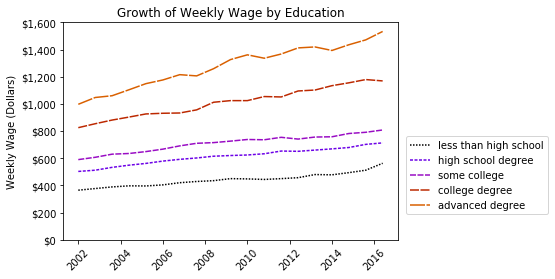

In [18]:
fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend(bbox_to_anchor=(1.01, 0.5), loc = "upper left")
ax.set_title('Growth of Weekly Wage by Education')

ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Weekly Wage (Dollars)')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


After some trial an error, we might find a way to squeeze the legend into the plot area, while setting the number of columns to 2 using the `ncol` argument.

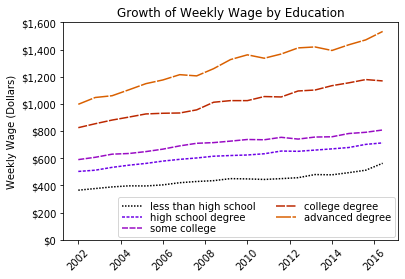

In [38]:
fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend(ncol = 2, labelspacing = .1, borderaxespad = 0, bbox_to_anchor=(0.9925, .0125), loc = "lower right")
ax.set_title('Growth of Weekly Wage by Education')

ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Weekly Wage (Dollars)')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


Things can get a lot more complicated than this.  A lot of the time, it will take a fair bit of trial and error (and searching the Internet) to move your plot elements into the position you want.  It will help if you know some of these basics.

### Annotations.

Let's see how to add annotations to the figure. This is done with the `text`, `arrow`, and `annotate` methods.

To add text, `Axes.text()` takes an x-coordinate, a y-coordinate, and a string label.  By default, the coordinates correspond to values of the x variable and the y variable.

An annotation, created with `Axes.annotate()`, consists of text and an arrow.  The `xy` argument represents the place on the graph the arrow should point to.  The `xytext` argument represents the place to put the text.

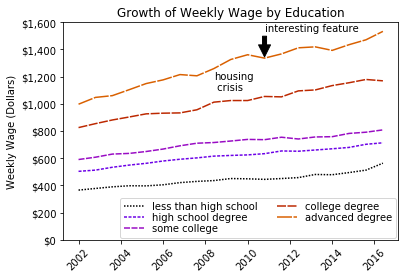

In [38]:
fig, ax = plt.subplots(1,1)
for var in W2.columns:
    ax.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
ax.set_ylim((0,1600))
ax.legend(ncol = 2, labelspacing = .1, borderaxespad = 0, bbox_to_anchor=(0.995, .01), loc = "lower right")
ax.set_title('Growth of Weekly Wage by Education')

ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Weekly Wage (Dollars)')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


ax.text(2008,1100,'housing\n crisis')
ax.annotate("interesting feature", xy = (2011, W2.advanced_degree[2011]), 
            xytext = (2011, W2.advanced_degree[2011]+200),
            arrowprops=dict(facecolor='black', shrink=0.05))
